## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE 239AS, Winter Quarter 2018, Prof. J.C. Kao, TAs C. Zhang and T. Xing

In [139]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0,0.5,'$y$')

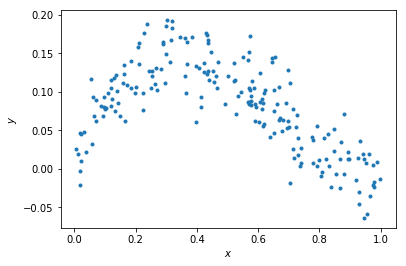

In [140]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) The generating distribution of x is uniform, since we're creating it via np.random.uniform.

(2) The distribution of the additive noise is Gaussian, since we're creating it via np.random.normal.

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [141]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))
#print(xhat)

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

#using normal eq
theta = np.linalg.inv(xhat.dot(xhat.T)).dot(xhat.dot(y))

# ================== #
# END YOUR CODE HERE #
# ================== #

[-0.10599633  0.13315817]


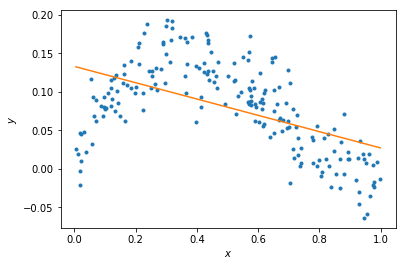

In [142]:
# Plot the data and your model fit.
print(theta)
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) The linear model underfits the data, since it is too simple. This data appears to resemble some higher order polynomial function (such as a parabola), but our linear model has no higher order terms.

(2) We can introduce higher order terms in order to improve the fit.

### Fitting data to the model (10 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [143]:

N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #
#create xhats
xhats.append(xhat)
#print(xhats[0])
for i in range(1,N):
   # print(xhats[i-1])
    arr = np.vstack((np.array(xhat[0]**(i+1)), xhats[i-1]) )
    xhats.append(arr)

#print(xhats[3])

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.
#theta = np.linalg.inv(xhat.dot(xhat.T)).dot(xhat.dot(y))
#print(theta)

for i in range(0, N):
    cur_theta = np.linalg.inv(xhats[i].dot(xhats[i].T)).dot(xhats[i].dot(y))
    thetas.append(cur_theta)
    

# ================== #
# END YOUR CODE HERE #
# ================== #

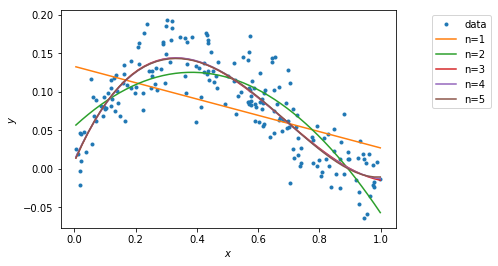

In [144]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (10 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [145]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.
from sklearn.metrics import mean_squared_error

#print(len(thetas[0].dot(plot_xs[0])))
#print(plot_xs[0][-2,:])
#mse = mean_squared_error(plot_xs[0][-2,:], thetas[0].dot(plot_xs[0]))
#print(mse)
for i in range(0, N):
    cur_training_error = mean_squared_error(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i])) 
#    print(cur_training_error)
    training_errors.append(cur_training_error)

min_error_index = np.argmin(training_errors) + 1
print("Best polynomial is order: " + str(min_error_index))

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Best polynomial is order: 1
Training errors are: 
 [0.2827733074571448, 0.28783217252404908, 0.28657446461141384, 0.28657775881481212, 0.28660370365922677]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) You fill this out.

(2) You fill this out.

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0,0.5,'$y$')

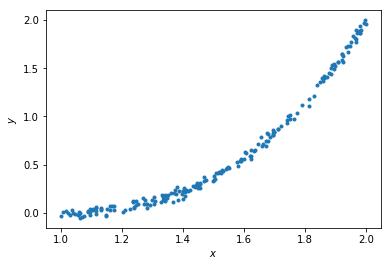

In [146]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [147]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

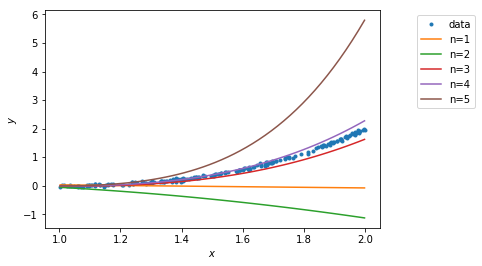

In [148]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [149]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.
for i in range(0, N):
    testing_errors.append(mean_squared_error(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i])))

index_min_error = np.argmin(testing_errors)    
print("Lowest test error for polynomial: " + str(index_min_error))
# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Lowest test error for polynomial: 3
Testing errors are: 
 [2.4368918652984757, 4.4425668880200586, 1.153106753518492, 0.91287458898841334, 1.9580347705204946]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) The 3rd order polynomial has the best test error.

(2) Order 5 polynomial models do not generalize well because they are overfitting. This means that the model is too complex and is able to effectively memorize the test data. Since linear regression "learning" is based on adjust weights the minimize a cost function, a complex higher order function that can memorize the test data will do very well in training (since the criteria is loss w/ respect to training data) but will do poorly on data that has not been incorporated into the generalization. Order 3 seems to be sufficiently complex such that it can reasonbly output values from the target distribution without overfitting.